# Introduction to Data Science 


## Lab 9: Hypothesis Testing (Chi-Square Test & T test)

**British University in Egypt**<br>
**Instructors:** Nahla Barakat
---

In [1]:
from IPython.display import HTML
style = "<style>div.exercise { background-color: #ffcccc;border-color: #E9967A; border-left: 5px solid #800080; padding: 0.5em;}</style>"
HTML(style)

In [2]:
import pandas as pd
import numpy as np

## A hypothesis
is a proposed explanation for a phenomenon. In the context of statistical hypothesis tests the term hypothesis is a statement about something that is supposed to be true.

### Some statistical-tests
z-test<br>
t-test<br>
ANOVA<br>
Chi-Square test<br>

### Chi-Square test
is a statistical test which is used to find out the difference between the observed and the expected data we can also use this test to find the correlation between categorical variables in our data. The purpose of this test is to determine if the difference between 2 categorical variables

### hypothesis Assumption For Chi-Test
**H0** (Null Hypothesis) = The 2 variables to be compared are independent.<br>
**H1** (Alternate Hypothesis) = The 2 variables are dependent.


### Chi-Square Steps
<ol>
    <strong>
<li>Collect observed frequency data</li>
<li>Calculate expected frequency data</li>
<li>Determine Degrees of Freedom</li>
<li>Calculate the chi square</li>
</ol>
<br>
If the chi square statistic exceeds the probability or table value (based upon a p-value of x and n degrees of freedom) the null hypothesis should be rejected.

### We will use a data from a survey as example

The Data is an exit poll which displays the joint responses to 2 categorical variables:
<br>people in categories from consider from 18–29, 30–44, 45–64 and >65 years, <br> and their political affiliation, which is “Conservative”, “Socialist” and “Other”. Is there any evidence of a relationship between the age group and their political affiliation, at 5% significant level?

**H0** (Null Hypothesis) = There is NO relationship between the age group and their political affiliation, at 5% significant level<br>,  ( the two variables are independent)

**H1** (Alternate Hypothesis) = There is a relationship between the age group and their political affiliation, at 5% significant level.   ( the two variables are dependent)

In [3]:
df=pd.read_excel('dataTest.xlsx')
df.head()

,Age Group,Political Affiliation
0,18-29,Conservative
1,18-29,Conservative
2,18-29,Conservative
3,18-29,Conservative
4,18-29,Conservative


In [4]:
df['Age Group'].unique()

array(['18-29', '30-44', '45-65', '65 & older'], dtype=object)

In [5]:
df['Political Affiliation'].unique()

array(['Conservative', 'Socialist', 'Other'], dtype=object)

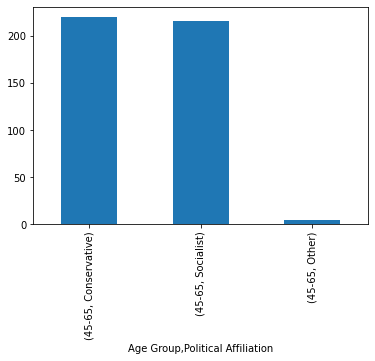

In [6]:
# Let's plot a sample of a bar plor
df[df['Age Group']=='45-65'].value_counts().plot(kind='bar');

## Let's calculate Chi Score

## Step 1: Collect observed frequency data

In [7]:
## Getting our new rows and cols
rows=df['Age Group'].unique()
cols=df['Political Affiliation'].unique()

In [8]:
## Counting the values
matrix=[]
for i in rows:
    l=[]
    for j in cols:
        l.append(len(df[(df['Age Group']==i) & (df['Political Affiliation']==j)]))
    matrix.append(l)
matrix

[[141, 68, 4], [179, 159, 7], [220, 216, 4], [86, 101, 4]]

In [9]:
pd.DataFrame(matrix,index=rows,columns=cols)

,Conservative,Socialist,Other
18-29,141,68,4
30-44,179,159,7
45-65,220,216,4
65 & older,86,101,4


In [10]:
# Creating a dataframe
observedValues=pd.DataFrame(matrix,index=rows,columns=cols)

#### After Counting, not we need to sum the rows and the cols

In [11]:
## We will use sum to sum the columns
observedValues.sum()

Conservative    626
Socialist       544
Other            19
dtype: int64

In [12]:
observedValues.loc['Total']=observedValues.sum()

In [13]:
observedValues

,Conservative,Socialist,Other
18-29,141,68,4
30-44,179,159,7
45-65,220,216,4
65 & older,86,101,4
Total,626,544,19


In [14]:
## Then sum with axis =1 to sum rows
observedValues['Total']=observedValues.sum(axis=1)

In [15]:
observedValues

,Conservative,Socialist,Other,Total
18-29,141,68,4,213
30-44,179,159,7,345
45-65,220,216,4,440
65 & older,86,101,4,191
Total,626,544,19,1189


#### Finally we finished the first step
## Step2: Calculate expected frequency data

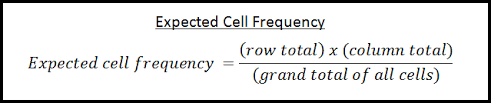

### So we will create the same dataframe, but the values will be the expected frequency

In [16]:
## An Illustration
matrix=[]
for i in rows:
    l=[]
    for j in cols:
        print(observedValues.loc[i,'Total'])
        print(observedValues.loc['Total',j])
        print(observedValues.loc['Total','Total'])
        break
    break

213
626
1189


In [17]:
matrix=[]
for i in rows:
    l=[]
    for j in cols:
        v=(observedValues.loc[i,'Total']*observedValues.loc['Total',j])/observedValues.loc['Total','Total']
        l.append(v)
    matrix.append(l)
matrix

[[112.14297729184189, 97.4533221194281, 3.4037005887300253],
 [181.64003364171572, 157.84693019343987, 5.513036164844407],
 [231.65685449957948, 201.3120269133726, 7.031118587047939],
 [100.56013456686291, 87.38772077375947, 3.0521446593776282]]

In [18]:
expectedF=pd.DataFrame(matrix,index=rows,columns=cols)
expectedF

,Conservative,Socialist,Other
18-29,112.142977,97.453322,3.403701
30-44,181.640034,157.846930,5.513036
45-65,231.656854,201.312027,7.031119
65 & older,100.560135,87.387721,3.052145


In [19]:
observedValues.drop('Total',axis=1,inplace=True)
observedValues.drop('Total',axis=0,inplace=True)

In [20]:
observedValues

,Conservative,Socialist,Other
18-29,141,68,4
30-44,179,159,7
45-65,220,216,4
65 & older,86,101,4


#### We finished Step 2,
### let's Determine Degrees of Freedom

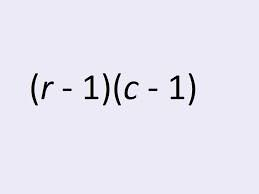

In [21]:
expectedF.shape

(4, 3)

In [22]:
freeDom=(expectedF.shape[0]-1)*(expectedF.shape[1]-1)
freeDom

6

#### We finished Step 3,
### let's Calculate the chi square

<img src='https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQiY4aA2NBkACxANJ-Wo-y17Yaw-RgyV6cf_w&usqp=CAU'>

#### We have observed values and expected, so let's calculate the chi score
### We need to shape the data into this table

<img src='https://2.bp.blogspot.com/-L2P9OCfmz98/WqINYS0bmvI/AAAAAAAABMQ/lRIMjyo0Snw2K9BnXrpjRH0eKBwgtsW0wCLcBGAs/s1600/ChiSquare-Table-Final.jpg' width='600'>

#### df.values.flatten will be used to convert df to 1d-array

In [23]:
observedValues.values.flatten()

array([141,  68,   4, 179, 159,   7, 220, 216,   4,  86, 101,   4],
      dtype=int64)

In [24]:
chiScoreTable=pd.DataFrame(observedValues.values.flatten(),columns=['O'])
chiScoreTable

,O
0,141
1,68
2,4
3,179
4,159
5,7
6,220
7,216
8,4
9,86


In [25]:
## Let's add Expected value
chiScoreTable['E']=expectedF.values.flatten()
chiScoreTable

,O,E
0,141,112.142977
1,68,97.453322
2,4,3.403701
3,179,181.640034
4,159,157.846930
5,7,5.513036
6,220,231.656854
7,216,201.312027
8,4,7.031119
9,86,100.560135


In [26]:
## Let's calculate O-E
chiScoreTable['O-E']=chiScoreTable['O']-chiScoreTable['E']
chiScoreTable

,O,E,O-E
0,141,112.142977,28.857023
1,68,97.453322,-29.453322
2,4,3.403701,0.596299
3,179,181.640034,-2.640034
4,159,157.846930,1.153070
5,7,5.513036,1.486964
6,220,231.656854,-11.656854
7,216,201.312027,14.687973
8,4,7.031119,-3.031119
9,86,100.560135,-14.560135


In [27]:
## Let's calculate (O-E)^2
chiScoreTable['(O-E)^2']=chiScoreTable['O-E']**2
chiScoreTable

,O,E,O-E,(O-E)^2
0,141,112.142977,28.857023,832.727760
1,68,97.453322,-29.453322,867.498184
2,4,3.403701,0.596299,0.355573
3,179,181.640034,-2.640034,6.969778
4,159,157.846930,1.153070,1.329570
5,7,5.513036,1.486964,2.211061
6,220,231.656854,-11.656854,135.882257
7,216,201.312027,14.687973,215.736553
8,4,7.031119,-3.031119,9.187680
9,86,100.560135,-14.560135,211.997519


In [28]:
## Let's calculate ((O-E)^2)\E
chiScoreTable['((O-E)^2)\E']=chiScoreTable['(O-E)^2']/chiScoreTable['E']
chiScoreTable

,O,E,O-E,(O-E)^2,((O-E)^2)\E
0,141,112.142977,28.857023,832.727760,7.425590
1,68,97.453322,-29.453322,867.498184,8.901679
2,4,3.403701,0.596299,0.355573,0.104467
3,179,181.640034,-2.640034,6.969778,0.038371
4,159,157.846930,1.153070,1.329570,0.008423
5,7,5.513036,1.486964,2.211061,0.401061
6,220,231.656854,-11.656854,135.882257,0.586567
7,216,201.312027,14.687973,215.736553,1.071653
8,4,7.031119,-3.031119,9.187680,1.306717
9,86,100.560135,-14.560135,211.997519,2.108167


## Finally, Chi Score is the sum of ((O-E)^2)\E Column

In [29]:
chiScore=chiScoreTable['((O-E)^2)\E'].sum()
chiScore

24.367421717305206

#### If the chi square statistic exceeds the probability or table value (based upon a p-value of x and n degrees of freedom) the null hypothesis should be rejected.

#### let's Get Tabular Value of chi tablue that Freedom is 6 and p-value is 0.05


<img src='https://www.mun.ca/biology/scarr/IntroPopGen-Table-D-01-smc.jpg'>

In [30]:
TabularValue=12.592

In [31]:
TabularValue,chiScore

(12.592, 24.367421717305206)

Since the chi square statistic exceeds  table value (based upon a p-value of x and n degrees of freedom) the null hypothesis should is rejected.

### You can get the tabular value of chi square using scipy library

In [32]:
from scipy.stats import chi2

deg_f = 6
sig = 0.05

chi2.ppf(1-sig, deg_f)

12.591587243743977

# T test
is a statistical test that is used to compare the means of two groups. It is often used in hypothesis testing to determine whether a process or treatment actually has an effect on the population of interest, or whether two groups are different from one another.

<img src='https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTNswI-NkiSb3VS7MRRvwVvs32kpJarWjzF-g&usqp=CAU'>
<img src='https://slideplayer.com/slide/5039206/16/images/20/Pooled+Estimate+of+the+Standard+Error+t-test+for+the+Difference+of+Means.jpg' width=500>

### Let's solve an exercise

we want to Compare the effectiveness of ammonium chloride and urea, on the grain yield of paddy,

In [33]:
## Here are our two samples
Ammonium_chloride=np.array([13.4,10.9,11.2,11.8,14,15.3,14.2,12.6,17,16.2,16.5,15.7])
Urea=np.array([12,11.7,10.7,11.2,14.8,14.4,13.9,13.7,16.9,16,15.6,16])

l1=len(Ammonium_chloride)
l2=len(Urea)
l1,l2

(12, 12)

**H0**: The effect of ammonium chloride and urea on grain yield of paddy are equal i.e., μ1 = μ2

**H1**: The effect of ammonium chloride and urea on grain yield of paddy is not equal i.e., μ1 ≠ 

#### Alpha = 0.05

#### we need to get these values

x̄1 and x̄2 are sample means for x1 and x2 respectively.<br>

n1 and n2 are the numbers of observations in x1 and x2 respectively.<br>

s1 and s2 are the sample standard deviation for x1 and x2 respectively.<br>

In [34]:
x1Mean=Ammonium_chloride.mean()
x2Mean=Urea.mean()
x1Mean,x2Mean

(14.066666666666665, 13.908333333333333)

In [35]:
x1var=Ammonium_chloride.var(ddof=1)
x2var=Urea.var(ddof=1)
x1var,x2var

(4.4787878787878785, 4.344469696969697)

In [36]:
num=(l1-1)*x1var+(l2-1)*x2var
dem=l1+l2-2
part1=num/dem
part2=(1/l1)+(1/l2)
S=np.sqrt(part1*part2)
S

0.8574797167551339

In [37]:
tScore=(x1Mean-x2Mean)/S
tScore

0.1846496543760765

In [38]:
## Degree of freedom n-k
## n = total for both groups 1 and 2 (35)
## k = number of groups
DegreeF=l1+l2-2
DegreeF

22

In [39]:
alpha = 0.05

In [40]:
## From t table, the value of degree 22 and alpha 0.05 is 0.85
import scipy
scipy.stats.t.ppf(1-0.05, 22)

1.717144374380242

In [41]:
scipy.stats.ttest_ind(Ammonium_chloride, Urea).statistic

0.1846496543760765

#### Since t Score < table value, we accept the H0


### Exercise

In [42]:
## You have a date of student's marks in two tests
## Do you think the marks give evidence that the students have benefited from the exam coaching?
alpha = 0.05
first_test =[23, 20, 19, 21, 18, 20, 18, 17, 23, 16, 19]
second_test=[24, 19, 22, 18, 20, 22, 20, 20, 23, 20, 18]

Hypothesis

H0: The students have not benefited from the tuition class. i.e.

H1: The students have benefited from the tuition class. i.e.

In [43]:
## Calculate the t score and t table value and comment if you will accept or reject the H0

################YouSol################
